In [ ]:
# This script is to learn the physics of waves and oscillation

In [1]:
# Load the modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import shutil
import re

In [4]:
# np.linspace(0, 100, 100)


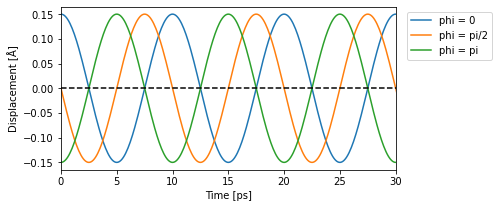


Timeperiod: 10.0 ps


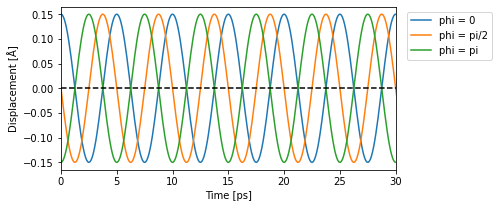


Timeperiod: 5.0 ps


In [32]:
# Free Oscillations of Systems with 1D of freedom:
"""
omega = angular frequency = 2*pi*f
phi = phase difference
A = Amplitude
y(t) = Displacement of object, like pendulum as a function of frequency and time
frequency is determined by material property
Amplitude is determined by oscillator
phi is determined as initial position of oscillation
time, how long you want to track the oscillation, at least 1 Timeperiod.
y_t = A*np.cos(omega*time + phi)
"""
time = np.linspace(0, 100, 1000)   # PS
f = 0.1 # THz
A = 0.15 # Ang, amplitude
# y_t = A*np.cos(omega*time + phi)

fig = plt.figure(figsize=(6,3))
plt.plot(time, A*np.cos(2*np.pi*f*time + 0*np.pi), label='phi = 0')
plt.plot(time, A*np.cos(2*np.pi*f*time + 0.5*np.pi), label='phi = pi/2')
plt.plot(time, A*np.cos(2*np.pi*f*time + 1*np.pi), label='phi = pi')
plt.xlabel("Time [ps]")
plt.ylabel("Displacement [Å]")
plt.xlim(-0.01, 30)
plt.axhline(0, color='k', ls='--')
# plt.ylim(0, 2000)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

print("\nTimeperiod:", 1/f, "ps")
# Note:
"""phi controls the initial starting position"""


# Let's change the frequency and keep everything constant
time = np.linspace(0, 100, 1000)   # PS
f = 0.2 # THz
A = 0.15 # Ang, amplitude
# y_t = A*np.cos(omega*time + phi)

fig = plt.figure(figsize=(6,3))
plt.plot(time, A*np.cos(2*np.pi*f*time + 0*np.pi), label='phi = 0')
plt.plot(time, A*np.cos(2*np.pi*f*time + 0.5*np.pi), label='phi = pi/2')
plt.plot(time, A*np.cos(2*np.pi*f*time + 1*np.pi), label='phi = pi')
plt.xlabel("Time [ps]")
plt.ylabel("Displacement [Å]")
plt.xlim(-0.01, 30)
plt.axhline(0, color='k', ls='--')
# plt.ylim(0, 2000)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

# Note:
"""As a function of time, as you increase frequency, there are more oscillation for given time"""

print("\nTimeperiod:", 1/f, "ps")


Timeperiod: 10.0 ps
Decay time: 5 ps


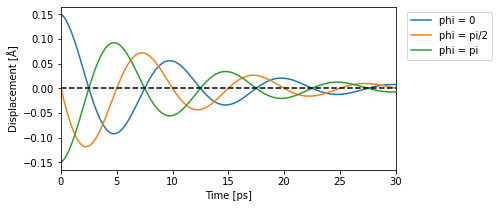


Timeperiod: 10.0 ps
Decay time: 10 ps


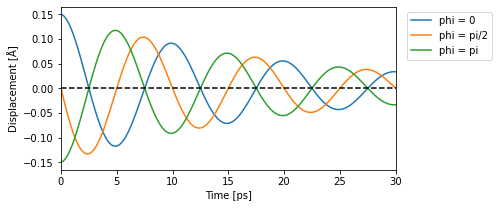

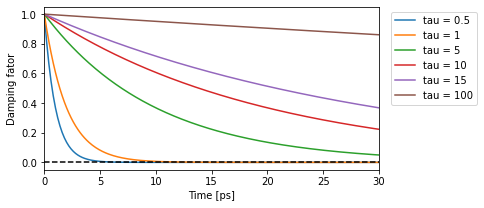

In [48]:
# Damped oscillation:
"""
omega = angular frequency = 2*pi*f
phi = phase difference
A = Amplitude
y(t) = Displacement of object, like pendulum as a function of frequency and time
frequency == determined by material property
Amplitude == determined by oscillator
phi == determined as initial position of oscillation
time== how long you want to track the oscillation, at least 1 Timeperiod.
tau = decay time
y_t = A*np.cos(omega*time + phi)
"""
time = np.linspace(0, 100, 1000)   # PS

#-----------------------------------------------------------
# Control variables
f = 0.1 # THz
A = 0.15 # Ang, amplitude
tau = 5
# y_t = y_t = A*e^(-t/2tau)*np.cos(omega*time + phi)

print("\nTimeperiod:", 1/f, "ps")
print("Decay time:", tau, "ps")

fig = plt.figure(figsize=(6,3))
plt.plot(time, A*np.exp(-time/(2*tau))*np.cos(2*np.pi*f*time + 0*np.pi), label='phi = 0')
plt.plot(time, A*np.exp(-time/(2*tau))*np.cos(2*np.pi*f*time + 0.5*np.pi), label='phi = pi/2')
plt.plot(time, A*np.exp(-time/(2*tau))*np.cos(2*np.pi*f*time + 1*np.pi), label='phi = pi')
plt.xlabel("Time [ps]")
plt.ylabel("Displacement [Å]")
plt.xlim(-0.01, 30)
plt.axhline(0, color='k', ls='--')
# plt.ylim(0, 2000)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

#-----------------------------------------------------------
# Control variables
f = 0.1 # THz
A = 0.15 # Ang, amplitude
tau = 10
# y_t = A*e^(-t/2tau)*np.cos(omega*time + phi)

print("\nTimeperiod:", 1/f, "ps")
print("Decay time:", tau, "ps")

fig = plt.figure(figsize=(6,3))
plt.plot(time, A*np.exp(-time/(2*tau))*np.cos(2*np.pi*f*time + 0*np.pi), label='phi = 0')
plt.plot(time, A*np.exp(-time/(2*tau))*np.cos(2*np.pi*f*time + 0.5*np.pi), label='phi = pi/2')
plt.plot(time, A*np.exp(-time/(2*tau))*np.cos(2*np.pi*f*time + 1*np.pi), label='phi = pi')
plt.xlabel("Time [ps]")
plt.ylabel("Displacement [Å]")
plt.xlim(-0.01, 30)
plt.axhline(0, color='k', ls='--')
# plt.ylim(0, 2000)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

#-----------------------------------------------------------
# Damping factor
fig = plt.figure(figsize=(6,3))

plt.plot(time, np.exp(-time/(2*0.5)), label='tau = 0.5')
plt.plot(time, np.exp(-time/(2*1)), label='tau = 1')
plt.plot(time, np.exp(-time/(2*5)), label='tau = 5')
plt.plot(time, np.exp(-time/(2*10)), label='tau = 10')
plt.plot(time, np.exp(-time/(2*15)), label='tau = 15')
plt.plot(time, np.exp(-time/(2*100)), label='tau = 100')
plt.xlabel("Time [ps]")
plt.ylabel("Damping fator")
plt.xlim(-0.01, 30)
plt.axhline(0, color='k', ls='--')
# plt.ylim(0, 2000)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

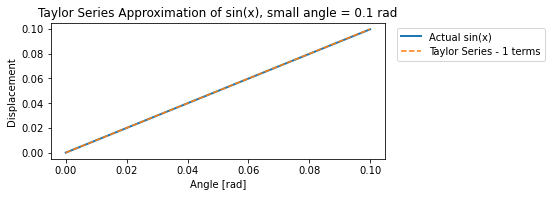

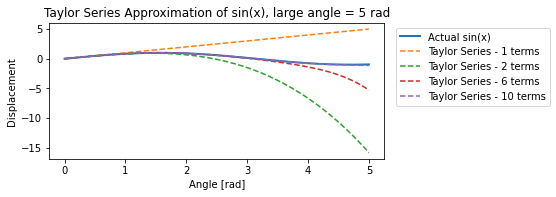

In [90]:
# Define the Taylor approximation
# sin(x) = x - x^3/3! + x^5/5! - x^7/7! + ...

def taylor_series_sin(x, n):
    """Calculate the n-th term of the Taylor series for sin(x)"""
    taylor_approx = 0
    for i in range(n//2+1):
        coef = (-1)**i
        num = x**(2*i + 1)
        denom = np.math.factorial(2*i + 1)
        taylor_approx += (coef) * (num / denom)
    return taylor_approx

# Small angle
x = np.linspace(0, 0.1, 400) # x = angle

# Plot the results
fig = plt.figure(figsize=(6,2.5))
plt.plot(x, np.sin(x), label='Actual sin(x)', linewidth=2)
plt.plot(x, taylor_series_sin(x, 1), label='Taylor Series - 1 terms', linestyle='dashed')
# plt.plot(x, taylor_series_sin(x, 2), label='Taylor Series - 2 terms', linestyle='dashed')
# plt.plot(x, taylor_series_sin(x, 6), label='Taylor Series - 6 terms', linestyle='dashed')
# plt.plot(x, taylor_series_sin(x, 10), label='Taylor Series - 10 terms', linestyle='dashed')
plt.title('Taylor Series Approximation of sin(x), small angle = 0.1 rad')
plt.xlabel('Angle [rad]')
plt.ylabel('Displacement')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
# plt.grid(True)
plt.show()

# Large angle
x = np.linspace(0, 5, 400) # x = angle

# Plot the results
fig = plt.figure(figsize=(6,2.5))
plt.plot(x, np.sin(x), label='Actual sin(x)', linewidth=2)
plt.plot(x, taylor_series_sin(x, 1), label='Taylor Series - 1 terms', linestyle='dashed')
plt.plot(x, taylor_series_sin(x, 2), label='Taylor Series - 2 terms', linestyle='dashed')
plt.plot(x, taylor_series_sin(x, 6), label='Taylor Series - 6 terms', linestyle='dashed')
plt.plot(x, taylor_series_sin(x, 10), label='Taylor Series - 10 terms', linestyle='dashed')
plt.title('Taylor Series Approximation of sin(x), large angle = 5 rad')
plt.xlabel('Angle [rad]')
plt.ylabel('Displacement')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
# plt.grid(True)
plt.show()


# Pendulum: 1D free oscillation
-----------------------------------------


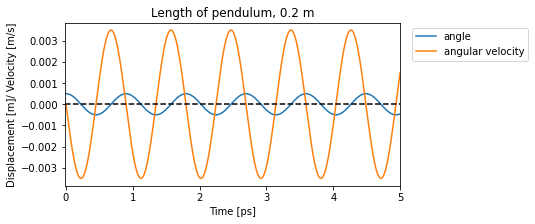

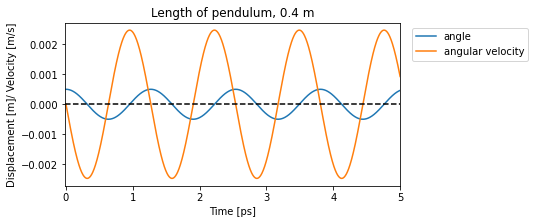

In [132]:
print("# Pendulum: 1D free oscillation")
print("-----------------------------------------")
time = np.linspace(0, 5, 1000)   # s
l = 0.2  # m
A = 0.0005 # m, amplitude
g = 9.8   # m/s2 
omega = np.sqrt(g/l) # w =sqrt(g/l)
phi = 0.0*np.pi
# y_t = A*np.cos(omega*time + phi)

fig = plt.figure(figsize=(6,3))
plt.plot(time, A*np.cos(omega*time + phi), label='angle')
plt.plot(time, -A*omega*np.sin(omega*time + phi), label='angular velocity')
plt.xlabel("Time [ps]")
plt.ylabel("Displacement [m]/ Velocity [m/s]")
plt.xlim(-0.01, 5)
plt.axhline(0, color='k', ls='--')
plt.title('Length of pendulum, 0.2 m')
# plt.ylim(0, 2000)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

l = 0.4  # m
omega = np.sqrt(g/l) # w =sqrt(g/l)
fig = plt.figure(figsize=(6,3))
plt.plot(time, A*np.cos(omega*time + phi), label='angle')
plt.plot(time, -A*omega*np.sin(omega*time + phi), label='angular velocity')
plt.xlabel("Time [ps]")
plt.ylabel("Displacement [m]/ Velocity [m/s]")
plt.xlim(-0.01, 5)
plt.axhline(0, color='k', ls='--')
plt.title('Length of pendulum, 0.4 m')
# plt.ylim(0, 2000)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

# Mass-spring: longitudinal oscillation
-----------------------------------------


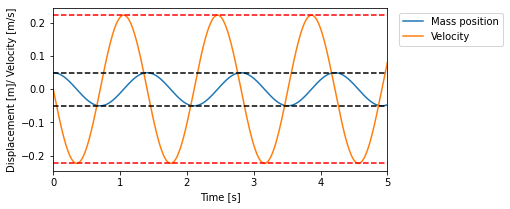

In [131]:
print("# Mass-spring: longitudinal oscillation")
print("-----------------------------------------")
time = np.linspace(0, 5, 1000)   # s
M = 0.5      # kg, mass attached to spring
A = 0.05 # m, amplitude
K = 5      # N/m, Spring constant 
omega = np.sqrt(2*K/M) # w =sqrt(2K/M)
phi = 0.0*np.pi
# y_t = A*np.cos(omega*time + phi)

fig = plt.figure(figsize=(6,3))
plt.plot(time, A*np.cos(omega*time + phi), label='Mass position')
plt.plot(time, -A*omega*np.sin(omega*time + phi), label='Velocity')
plt.xlabel("Time [s]")
plt.ylabel("Displacement [m]/ Velocity [m/s]")
plt.xlim(-0.01, 5)
plt.axhline(A, color='k', ls='--')
plt.axhline(-A, color='k', ls='--')
plt.axhline(-A*omega, color='r', ls='--')
plt.axhline(A*omega, color='r', ls='--')
# plt.ylim(0, 2000)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

# Mass-spring: Transverse oscillation
-----------------------------------------


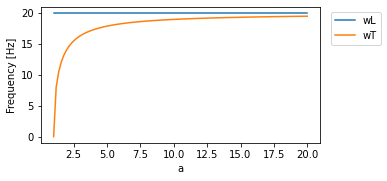

In [156]:
print("# Mass-spring: Transverse oscillation")
print("-----------------------------------------")
# Solution ot transverse oscillation is not harmonic
# Longitudinal and transverse oscillation have different frequency
# wL > wtr
"""
a0 = Rest length of spring
a = Equillibrium length 

"""
a0 = 1 # m
K = 2  # N/m
M = 0.01  # Kg
a = np.linspace(1, 20, 100)
wL = np.sqrt(2*K*a/(M*a))  # Longitudinal frequency
wtr = np.sqrt(2*K*(a-a0)/(M*a)) # Transverse frequency

fig = plt.figure(figsize=(5,2.5))
plt.plot(a, wL, label='wL')
plt.plot(a, wtr, label='wT')
plt.xlabel("a")
plt.ylabel("Frequency [Hz]")
# plt.xlim(-0.01, 5)
# plt.axhline(A, color='k', ls='--')
# plt.axhline(-A, color='k', ls='--')
# # plt.ylim(0, 2000)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()